# This notebook is used to explore the datasets

In [55]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
#Load data
netflix = pd.read_csv('Data/netflix_titles.csv')
prime = pd.read_csv('Data/amazon_prime_titles.csv')
disney = pd.read_csv('Data/disney_plus_titles.csv')
hulu = pd.read_csv('Data/hulu_titles.csv')
platforms = pd.read_csv('Data/MoviesOnStreamingPlatforms.csv')

In [5]:
# Overview of individual dataframe
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
print('The amount of titles per platform')
print('netflix:',netflix.shape[0])
print('prime:',prime.shape[0])
print('disney:',disney.shape[0])
print('hulu:',hulu.shape[0])

The amount of titles per platform
netflix: 8807
prime: 9668
disney: 1450
hulu: 3073


In [9]:
# Overview of the platform dataframe
platforms

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [40]:
def top_in_attr(dataframe, attribute, count=10):
    df_temp = dataframe.groupby(attribute).count()[['show_id']]
    df_temp.columns = ['count']
    return df_temp.sort_values('count',ascending=False).head(count)

In [44]:
# top 10 netflix directors by count
top_in_attr(netflix,'director')

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12
Martin Scorsese,12


In [37]:
# Share of Movies vs TV-shows in netflix
top_in_attr(netflix,'type')

,count
type,
Movie,6131
TV Show,2676


In [38]:
top_in_attr(netflix,'country')

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [45]:
top_in_attr(netflix,'release_year')

,count
release_year,
2018,1147
2017,1032
2019,1030
2020,953
2016,902
2021,592
2015,560
2014,352
2013,288


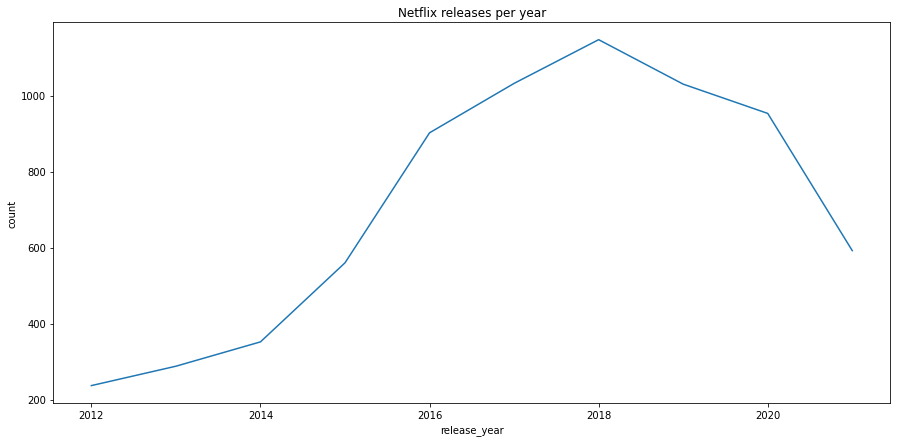

In [72]:
a = top_in_attr(netflix,'release_year')
plt.figure(figsize=(15, 7))
release_years = sns.lineplot(x="release_year",
                            y="count",
                            data=a
                            ).set_title('Netflix releases per year')
plt.show()

In [73]:
top_in_attr(netflix,'rating')

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [92]:
# The unique categories
netflix_categories = netflix['listed_in'].str.split(',').explode('listed_in').unique()
netflix_categories

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [164]:
#netflix categories grouped
a = netflix['listed_in'].str.split(',').explode('listed_in')
b = pd.DataFrame(a.groupby(a).count())
b.columns = ['count']
b['category'] = b.index
c = b.sort_values('count', ascending=False)[:20]

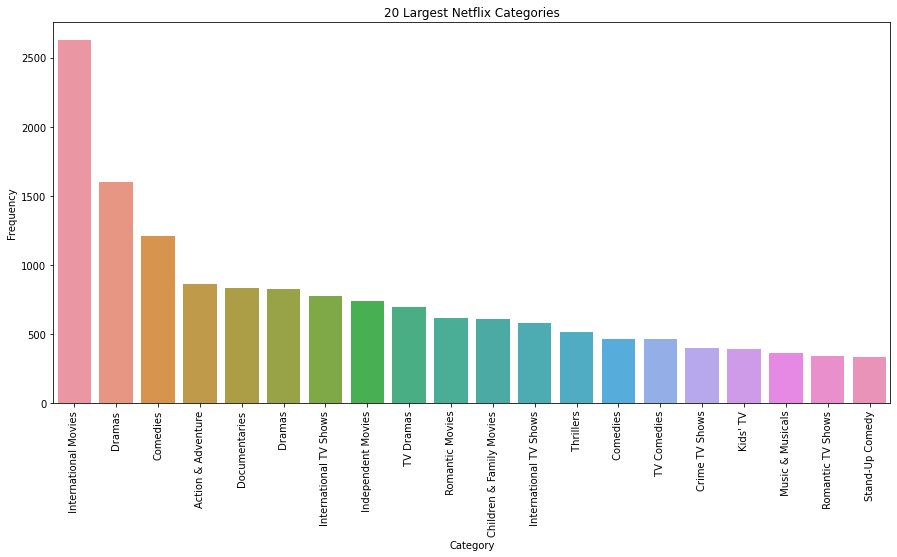

In [171]:
plt.figure(figsize=(15, 7))
sns.barplot(x='category', y='count', data=c)
plt.title('20 Largest Netflix Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()